In [17]:
pip install category_encoders

   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB 325.1 kB/s eta 0:00:01
   ----------------------------------- ---- 71.7/81.9 kB 653.6 kB/s eta 0:00:01
   ----------------------------------- ---- 71.7/81.9 kB 653.6 kB/s eta 0:00:01
   ----------------------------------- ---- 71.7/81.9 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 351.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder, CountEncoder

**IMPORTATION DES DONNEES**

In [3]:
Titanic = pd.read_csv("C:/Users/Dieng/Downloads/QUELQUES COURS/titanic.csv")

In [5]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Regroupement de la colonne Age en differents groupes: enfants, adultes, agés

In [7]:
print(Titanic['Age'].min())
print(Titanic['Age'].max())
bins = [0,17,59,80]
labels = ['enfant', 'adulte','agée']
pd.cut(Titanic['Age'], bins=bins, labels = labels).dropna()

0.42
80.0


0      adulte
1      adulte
2      adulte
3      adulte
4      adulte
        ...  
885    adulte
886    adulte
887    adulte
889    adulte
890    adulte
Name: Age, Length: 714, dtype: category
Categories (3, object): ['enfant' < 'adulte' < 'agée']

Regroupement de la colonne Tarif  en diférents gammes: faible, moyen et élevé

In [9]:
print(Titanic['Fare'].min())
print(Titanic['Fare'].max())
bins = [0]+list(Titanic['Fare'].quantile([0.25,0.75]).values)+[Titanic['Fare'].max()]
labels = ['faible', 'moyen','élevé']
pd.cut(Titanic['Fare'], bins=bins, labels = labels).dropna()

0.0
512.3292


0      faible
1       élevé
2       moyen
3       élevé
4       moyen
        ...  
886     moyen
887     moyen
888     moyen
889     moyen
890    faible
Name: Fare, Length: 876, dtype: category
Categories (3, object): ['faible' < 'moyen' < 'élevé']

Agrégation:- Regrouprz l'ensemble de données par « Pclass » et calculez l'« Âge » et le « Tarif » moyens pour chaque classe.-
 Regrourez l'ensemble de données par « Sexe » et calculez le nombre total de passagers et l'« Âge » moyen pour
 chaque sexe.

In [11]:

 print('Average age by Pclass:')
 print(Titanic.groupby('Pclass')['Age'].mean())
 print('\n')
 print('Average fare by Pclass:')
 print(Titanic.groupby('Pclass')['Fare'].mean())

Average age by Pclass:
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


Average fare by Pclass:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


Decomposition de la colonne nom en 'Titre' et 'nom'

In [13]:
Titanic['Titre'] = Titanic['Name'].apply(lambda name : name.split('.')[0].split(',')[1])
Titanic['nom'] = Titanic['Name'].apply(lambda name : name.split('.')[0].split(',')[0])
Titanic[['Name','Titre','nom']].dropna()

,Name,Titre,nom
0,"Braund, Mr. Owen Harris",Mr,Braund
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,Cumings
2,"Heikkinen, Miss. Laina",Miss,Heikkinen
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,Futrelle
4,"Allen, Mr. William Henry",Mr,Allen
...,...,...,...
886,"Montvila, Rev. Juozas",Rev,Montvila
887,"Graham, Miss. Margaret Edith",Miss,Graham
888,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,Johnston
889,"Behr, Mr. Karl Howell",Mr,Behr


Créer une nouvelle colonne « Family» en additionnant les colonnes « SibSp » et « Parch »

Créer une nouvelle colonne « Seul» pour indiquer si un passager voyage seul ou avec
 famille.

In [15]:
Titanic['Family'] = Titanic['SibSp']+Titanic['Parch']
Titanic['Seul'] = Titanic['Family'].apply(lambda size: 'No' if size >= 1 else 'Yes')
Titanic[['Name','SibSp','Parch','Family','Seul']]

,Name,SibSp,Parch,Family,Seul
0,"Braund, Mr. Owen Harris",1,0,1,No
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,No
2,"Heikkinen, Miss. Laina",0,0,0,Yes
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,No
4,"Allen, Mr. William Henry",0,0,0,Yes
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",0,0,0,Yes
887,"Graham, Miss. Margaret Edith",0,0,0,Yes
888,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,3,No
889,"Behr, Mr. Karl Howell",0,0,0,Yes


Transformation:- Encodez les caractéristiques catégorielles (par exemple, « Sexe », « Embarqué ») à l'aide de techniques appropriées (par exemple, one-hot-e encodage, encodage des étiquettes). Mentionnez les 5 meilleures techniques d'encodage catégoriel et énumérez également
 les principales différences entre eux avec les scénarios les plus appropriés dans lesquels nous pouvons les utiliser.

In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder, CountEncoder

# Initialisation
saved_encoders = {}

# Supprimer les NaN et sélectionner des fonctionnalités
Titanic.dropna(subset=['Sex', 'Embarked'], inplace=True)
features = Titanic[['Sex', 'Embarked']]

def OneHotEncoderFunction(features_to_encode):
    encoder = OneHotEncoder(sparse_output=False)
    encoder.fit(features_to_encode)
    saved_encoders['OneHotEncoder_' + '_'.join(features_to_encode.columns)] = encoder

def LabelEncoderFunction(features_to_encode):
    for col in features_to_encode.columns:
        encoder = LabelEncoder()
        encoder.fit(features_to_encode[col])
        saved_encoders['LabelEncoder_' + str(col)] = encoder

def OrdinalEncoderFunction(features_to_encode):
    categories = [sorted(list(features_to_encode[col].unique())) for col in features_to_encode.columns]
    encoder = OrdinalEncoder(categories=categories)
    encoder.fit(features_to_encode)
    saved_encoders['OrdinalEncoder_' + '_'.join(features_to_encode.columns)] = encoder

def BinaryEncoderFunction(features_to_encode):
    encoder = BinaryEncoder(cols=features_to_encode.columns)
    encoder.fit(features_to_encode)
    saved_encoders['BinaryEncoder_' + '_'.join(features_to_encode.columns)] = encoder

def CountEncoderFunction(features_to_encode):
    encoder = CountEncoder(cols=features_to_encode.columns)
    encoder.fit(features_to_encode)
    saved_encoders['CountEncoder_' + '_'.join(features_to_encode.columns)] = encoder

# Liste des fonctions d'encodage
encoder_functions = [OneHotEncoderFunction, OrdinalEncoderFunction, BinaryEncoderFunction, CountEncoderFunction]

# Appliquer chaque fonction d'encodage aux fonctionnalités
for fun in encoder_functions:
    fun(features)

# Afficher les encoders sauvegardés
for encoder_name, encoder in saved_encoders.items():
    print(f"{encoder_name}: {encoder}")


OneHotEncoder_Sex_Embarked: OneHotEncoder(sparse_output=False)
OrdinalEncoder_Sex_Embarked: OrdinalEncoder(categories=[['female', 'male'], ['C', 'Q', 'S']])
BinaryEncoder_Sex_Embarked: BinaryEncoder(cols=Index(['Sex', 'Embarked'], dtype='object'),
              mapping=[{'col': 'Sex',
                        'mapping':     Sex_0  Sex_1
 1      0      1
 2      1      0
-1      0      0
-2      0      0},
                       {'col': 'Embarked',
                        'mapping':     Embarked_0  Embarked_1
 1           0           1
 2           1           0
 3           1           1
-1           0           0
-2           0           0}])
CountEncoder_Sex_Embarked: CountEncoder(cols=Index(['Sex', 'Embarked'], dtype='object'),
             combine_min_nan_groups=True)


In [19]:
encoded_dfs = {}

for encoder_name, encoder in saved_encoders.items():
    if 'OneHotEncoder' in encoder_name:
        transformed_data = encoder.transform(features)
        columns = encoder.get_feature_names_out(features.columns)
        encoded_df = pd.DataFrame(transformed_data, columns=columns)
    
    elif 'LabelEncoder' in encoder_name:
        column = encoder_name.split('_')[-1]
        transformed_data = encoder.transform(features[column])
        encoded_df = pd.DataFrame(transformed_data, columns=[column + '_encoded'])
    
    elif 'OrdinalEncoder' in encoder_name:
        transformed_data = encoder.transform(features)
        columns = [col + '_ordinal' for col in features.columns]
        encoded_df = pd.DataFrame(transformed_data, columns=columns)
    
    elif 'BinaryEncoder' in encoder_name:
        transformed_data = encoder.transform(features)
        columns = transformed_data.columns
        encoded_df = pd.DataFrame(transformed_data, columns=columns)
    
    elif 'CountEncoder' in encoder_name:
        transformed_data = encoder.transform(features)
        columns = transformed_data.columns
        encoded_df = pd.DataFrame(transformed_data, columns=columns)
    
    # Stocker le DataFrame dans un dictionnaire
    encoded_dfs[encoder_name] = encoded_df

# Affichage
for encoder_name, df in encoded_dfs.items():
    print(f"\n{encoder_name}:\n", df)



OneHotEncoder_Sex_Embarked:
      Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0           0.0       1.0         0.0         0.0         1.0
1           1.0       0.0         1.0         0.0         0.0
2           1.0       0.0         0.0         0.0         1.0
3           1.0       0.0         0.0         0.0         1.0
4           0.0       1.0         0.0         0.0         1.0
..          ...       ...         ...         ...         ...
884         0.0       1.0         0.0         0.0         1.0
885         1.0       0.0         0.0         0.0         1.0
886         1.0       0.0         0.0         0.0         1.0
887         0.0       1.0         1.0         0.0         0.0
888         0.0       1.0         0.0         1.0         0.0

[889 rows x 5 columns]

OrdinalEncoder_Sex_Embarked:
      Sex_ordinal  Embarked_ordinal
0            1.0               2.0
1            0.0               0.0
2            0.0               2.0
3            0.0               

**Valeurs manquantes, valeurs aberrantes, données catégorielles**

In [21]:
 import warnings
 warnings.filterwarnings('ignore')
 from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
 from scipy.stats import zscore
 import matplotlib.pyplot as plt
 import seaborn as sns

In [23]:
#On importe à nouveau les données
Titanic = pd.read_csv("C:/Users/Dieng/Downloads/QUELQUES COURS/titanic.csv")

In [25]:
# Affiche le nombre de lignes et de colonnes dans le jeu de données.
Titanic.shape

(891, 12)

In [27]:
# Afficher les statistiques sommaires de l'ensemble de données.
Titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Etape1: Traitemet des valeurs manquantes**

In [29]:
# Identifier les colonnes avec des valeurs manquantes.
for col in Titanic.columns:
    if Titanic[col].isnull().sum() > 0:
        print(f"'{col}' a {Titanic[col].isnull().sum()} valeurs maquantes")


'Age' a 177 valeurs maquantes
'Cabin' a 687 valeurs maquantes
'Embarked' a 2 valeurs maquantes


Imputez les valeurs manquantes dans la colonne 'Âge' avec l'âge moyen des passagers.

Imputez les valeurs manquantes dans la colonne 'Embarqué' avec la valeur la plus fréquente.

In [31]:
Titanic['Age'].fillna(Titanic['Age'].mean(),inplace=True)
print(f"Après imputation des valeurs manquantes dans la colonne « Age » avec l'âge moyen des passagers, 'Age' la colonne a {Titanic['Age'].isnull().sum()} valeurs manquantes")

Titanic['Embarked'].fillna(Titanic['Embarked'].mode()[0],inplace=True)
print(f"Après imputation des valeurs manquantes dans la colonne « Embarked » avec la valeur la plus fréquente, 'Embarked' la colonne a {Titanic['Embarked'].isnull().sum()} valeurs manquantes")

Après imputation des valeurs manquantes dans la colonne « Age » avec l'âge moyen des passagers, 'Age' la colonne a 0 valeurs manquantes
Après imputation des valeurs manquantes dans la colonne « Embarked » avec la valeur la plus fréquente, 'Embarked' la colonne a 0 valeurs manquantes


In [33]:
# Supprimer la colonne 'Cabin' de l'ensemble de données
Titanic.drop(columns=['Cabin'],inplace=True)
if 'Cabin' not in Titanic.columns:
   print("L'élimination de la colonne « Cabin » de l'ensemble de données est fait avec succès.")
else:
   print("'Cabin' est toujours présente dans l'ensemble de données")

L'élimination de la colonne « Cabin » de l'ensemble de données est fait avec succès.


**Etape 2**

In [ ]:
-Traiter les variables catégorielles :- Convertir la colonne 'Sexe' en valeurs numériques, où 0 représente une femme et 1
 représente un homme
-Créer des variables fictives pour la colonne « Embarqué -
-Traiter les valeurs aberrate--Identifier les colonnes susceptibles de présenter des valeurs aberran-.-# Utiliser les techniques appropriées (par exemple, Z-score, IQR) pour identifier et traiter les valeurs aberrantes dans l'ensemble de donées.
 les valeurs aberrantes dans l'ensemble denndo-ée-
 # Validation denn do-ée-
 # Vérifier s'il y a des lignes en double dans l'ensemble de -nn-.
 # Supprimer les lignes en double, le cas-ch-t.
 # Transformation des-on-s :
 # Créer une nouvelle colonne appelée 'Fam' en
 # en additionnant les colonnes 'SibSp'-t 'Parch'.
 # Créer une nouvelle colonne appelée 'Title' en extrayant les # titres de la colonne 'Name'.
 Créer une nouvelle colonne appelée 'Title' en extrayant les # titres de la c-onne 'Name'.
 # Normalisatio-des données :
 # Normaliser les données en utilisant des techniques de mise à l'échelle appropriées (par exemple, mise à l'échelle Min-Max, ␣ standardisation).-Normalisation).
 # Expliquer les principales différences entre la normalisation et la standardisation, et expliquer quand il est nécessaire de normaliser les donnée-
 Quand utiliser
 # Quand utiliser ces méthodes dans des problèmes basés sur -s scénarios réels.
 # dans des problèmes basés suL.com (version gratuite)

In [ ]:
# Traiter les variables catégorielles :
 # Convertir la colonne 'Sexe' en valeurs numériques, où 0 représente une femme et 1 représente un homme.
 # Créer des variables fictives pour la colonne 'Embarqué'.

In [35]:
def label_ecoder(col):
    encoder = LabelEncoder()
    encoded_column = encoder.fit_transform(col)
    label_mapping = {label:index for index,label in enumerate(encoder.classes_)}
    print(f'label mapping of {col.name} column: {label_mapping}')
    return encoded_column,encoder
saved_encoders = {}
for col in ['Sex','Embarked']:
   encoded_column, encoder = label_ecoder(Titanic[col])
   Titanic[col] = encoded_column
   saved_encoders[col]=encoder
print(f'saved encoders: {saved_encoders}')

label mapping of Sex column: {'female': 0, 'male': 1}
label mapping of Embarked column: {'C': 0, 'Q': 1, 'S': 2}
saved encoders: {'Sex': LabelEncoder(), 'Embarked': LabelEncoder()}


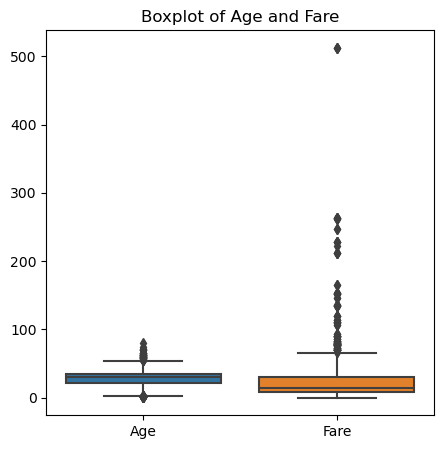

In [37]:
# Traitement des valeurs aberrantes :
 # Identifier les colonnes qui peuvent avoir des valeurs aberrantes.
 # Utiliser les techniques appropriées pour identifier et traiter les valeurs aberrantes dans l'ensemble de données. les valeurs aberrantes dans l'ensemble de données.

plt.figure(figsize=(5, 5))
sns.boxplot(Titanic[['Age','Fare']])
plt.title('Boxplot of Age and Fare')
plt.show()

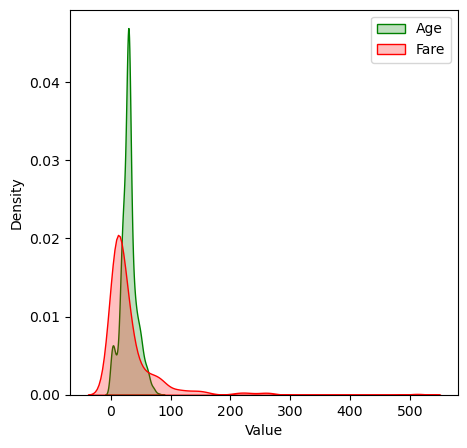

In [39]:
plt.figure(figsize=(5, 5))
sns.kdeplot(Titanic['Age'], shade=True, label='Age', color='green')
sns.kdeplot(Titanic['Fare'], shade=True, label='Fare', color='red')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

In [41]:
numerical_col = ['Age','Fare']
for col in numerical_col:
    outlier_count = ((zscore(Titanic[col])>3) | (zscore(Titanic[col])<-3)).sum()
    print(f"Il y a {outlier_count} valeurs aberrantes sur {Titanic[col].count()} dans la colonne '{col}' en utilisant la methode Z-score")
print('\n')

for col in numerical_col:
   first_quartile = Titanic[col].quantile(0.25)
   third_quartile = Titanic[col].quantile(0.75)
   iqr = third_quartile- first_quartile
   outlier_count = ((Titanic[col]<first_quartile-1.5*iqr) | (Titanic[col]>third_quartile+1.5*iqr)).sum()
   print(f"Il y a {outlier_count} valeurs aberrantes sur {Titanic[col].count()} dans la colonne '{col}' en utilisant la methode Z-score")

Il y a 7 valeurs aberrantes sur 891 dans la colonne 'Age' en utilisant la methode Z-score
Il y a 20 valeurs aberrantes sur 891 dans la colonne 'Fare' en utilisant la methode Z-score


Il y a 66 valeurs aberrantes sur 891 dans la colonne 'Age' en utilisant la methode Z-score
Il y a 116 valeurs aberrantes sur 891 dans la colonne 'Fare' en utilisant la methode Z-score


In [43]:
# Traiter les valeurs aberrantes dans l'ensemble de données
criteria_1 = (zscore(Titanic['Age'])>3) | (zscore(Titanic['Age'])<-3)
criteria_2 = (Titanic['Fare']<first_quartile-1.5*iqr) | (Titanic['Fare']>third_quartile+1.5*iqr)
Titanic = Titanic[~(criteria_1 | criteria_2)]
Titanic.reset_index(drop=True,inplace= True)
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
3,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
4,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,1
...,...,...,...,...,...,...,...,...,...,...,...
764,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
765,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
766,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2
767,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0


**Validation des données**

In [45]:
# Vérifier s'il y a des lignes en double dans l'ensemble de données.
# Supprimer les lignes en double, le cas échéant.

if Titanic.duplicated().sum() == 0:
   print(f'Il y a {Titanic.duplicated().sum()} lignes dupliquées')
else:
  print(f'Il y a {Titanic.duplicated().sum()} lignes dupliquées')
  Titanic.drop_duplicates()
  print(f'après élimination des doublons, il y a {Titanic.duplicated().sum()} lignes dupliquées')

Il y a 0 lignes dupliquées


In [47]:
# Transformation des données :
# Créer une nouvelle colonne appelée 'FamilySize' en additionnant les colonnes 'SibSp' et 'Parch'.
# Créer une nouvelle colonne appelée 'Title' en extrayant les titres de la colonne 'Name'.

Titanic['FamilySize'] = Titanic['SibSp'] + Titanic['Parch']
Titanic['Title'] = Titanic['Name'].apply(lambda name: name.split(',')[1].split('.')[0])
Titanic[['Title','FamilySize']]

,Title,FamilySize
0,Mr,1
1,Miss,0
2,Mrs,1
3,Mr,0
4,Mr,0
...,...,...
764,Rev,0
765,Miss,0
766,Miss,3
767,Mr,0


**Normalisation des données**

In [49]:
# Normaliser les données à l'aide de techniques de mise à l'échelle appropriées (par exemple, mise à l'échelle Min-Max, normalisation).

saved_scalers={}

scaler_standard = StandardScaler()
Titanic['Age'] = scaler_standard.fit_transform(Titanic[['Age']])
saved_scalers[Titanic['Age'].name] = scaler_standard
scaler_minmax = MinMaxScaler()
Titanic['Fare'] = scaler_minmax.fit_transform(Titanic[['Fare']])
saved_scalers[Titanic['Fare'].name] = scaler_minmax
print(saved_scalers)
print('Columns after scaling: ')
Titanic[['Age','Fare']]

{'Age': StandardScaler(), 'Fare': MinMaxScaler()}
Columns after scaling: 


,Age,Fare
0,-0.553488,0.111538
1,-0.226142,0.121923
2,0.510386,0.816923
3,0.510386,0.123846
4,0.076581,0.130128
...,...,...
764,-0.144305,0.200000
765,-0.798997,0.461538
766,0.076581,0.360769
767,-0.226142,0.461538


**Vérification des données**


-# Validez les données après le nettoyage en effectuant les contrôles suivants. # 1. Vérifiez s'il reste des valeurs manquantes dans l'ensemble de données.  # 2. Vérifier s'il reste des valeurs aberrantes dans l'ensemble de données 
 # 3. Vérifier si les variables catégorielles ont été correctement encodée 
 # 4. vérifier si les données ont été correctement normalisées.

In [51]:
#Vérifier s'il reste des valeurs manquantes dans l'ensemble de données.
if Titanic.isnull().sum().sum() == 0:
  print('Il ne reste aucune valeur manquante dans les données')
else:
  print(f'Il y a {Titanic.isnull().sum().sum()} valeur manquante dans les données')

Il ne reste aucune valeur manquante dans les données


In [53]:
# Vérifier s'il reste des valeurs aberrantes dans l'ensemble de données.
numerical_col = ['Age']
for col in numerical_col:
  outlier_count = ((zscore(Titanic[col])>3) | (zscore(Titanic[col])<-3)).sum()
  print(f"Il y a {outlier_count} valeurs aberrantes sur {Titanic[col].count()} dans la colonne'{col}' en utilisant la methode Z-score ")
    
print('\n')
numerical_col = ['Fare']
for col in numerical_col:
   first_quartile = Titanic[col].quantile(0.25)
   third_quartile = Titanic[col].quantile(0.75)
   iqr = third_quartile- first_quartile
   outlier_count = ((Titanic[col]<first_quartile-1.5*iqr) | (Titanic[col]>third_quartile+1.5*iqr)).sum()
   print(f"Il y a {outlier_count} valeurs aberrantes sur {Titanic[col].count()} dans la colonne '{col}' en utilisant la methode Z-score")

Il y a 1 valeurs aberrantes sur 769 dans la colonne'Age' en utilisant la methode Z-score 


Il y a 25 valeurs aberrantes sur 769 dans la colonne 'Fare' en utilisant la methode Z-score


In [55]:
# Vérifier que les variables catégorielles ont été correctement encodées.
print(Titanic['Sex'].unique())
print(Titanic['Embarked'].unique())

[1 0]
[2 1 0]


In [57]:
# Vérifier si les données ont été correctement normalisées
if ((Titanic['Fare']>=1) & (Titanic['Fare']<=0)).sum() == 0:
  print(f'Toutes les valeurs sont comprises dans intervalle 0 et 1 pour la colonne {Titanic["Fare"].name}. Les données ont donc été correctement normalisées')
else:
  print('les données ne sont pas correctement normalisées')
#If the data is properly standarised:
if abs(Titanic['Age'].mean()>1e-6) or abs(Titanic['Age'].std(ddof=0)-1>1e-6):
  print(f'Les données ne sont pas correctement normalisées pour la colonne {Titanic["Age"].name}')
else:
  print(f'Les données ne sont pas correctement normalisées pour la colonne {Titanic["Age"].name}')

Toutes les valeurs sont comprises dans intervalle 0 et 1 pour la colonne Fare. Les données ont donc été correctement normalisées
Les données ne sont pas correctement normalisées pour la colonne Age
